Visualise geographic data in.HE5 files, using Basemap

In [91]:
#coding: utf-8
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import h5py

In [94]:
# Open file.
f1 = 'AMSR_2_L2_RainOcean_R00_201812150038_D.he5'
d1 = '/HDFEOS/SWATHS/GPROF2010V2/Data Fields/surfacePrecipitation'
l1='/HDFEOS/SWATHS/GPROF2010V2/Geolocation Fields/Longitude'
l2='HDFEOS/SWATHS/GPROF2010V2/Geolocation Fields/Latitude'

#HDFEOS/SWATHS/GPROF2010V2/Geolocation Fields/Latitude
#HDFEOS/SWATHS/GPROF2010V2/Geolocation Fields/Longitude


def plotmap(FILE_NAME, DATAFIELD_NAME, longi, lati):
    f=h5py.File(FILE_NAME, mode='r')
    a=f.keys()  
#print(a)
#dset=f[a[0]]
#print(dset)
#print(type(dset))
#def printname(name):
     #print name
#f.visit(printname)
    dset = f[DATAFIELD_NAME]
    data = dset[:]  
    datalongi=f[longi]
    datalati=f[lati]
#units = dset.attrs['Units'].decode()
    longitude=datalongi[:]
    latitude=datalati[:]
# Read dataset.
#DATAFIELD_NAME='HDFEOS'
#dset = f[DATAFIELD_NAME]
# Handle fill value.
#data[data == dset.fillvalue] = np.nan
#data = np.ma.masked_where(np.isnan(data), data)
# Get attributes needed for the plot.
# String attributes actually come in as the bytes type and should
# be decoded to UTF-8 (python3).
#title = dset.attrs['Title'].decode()
#units = dset.attrs['Units'].decode()
    # Draw an equidistant cylindrical projection using the low resolution
    # coastline database.
    m = Basemap(width=20,height=20,projection='cyl', resolution='l',
    llcrnrlat=-89.3, urcrnrlat = 89.2,
    llcrnrlon=-180, urcrnrlon = 180)
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
    m.pcolormesh(longitude, latitude, data, latlon=True)
    cb = m.colorbar()
#cb.set_label(units)
    basename = os.path.basename(FILE_NAME)
#plt.title('{0}\n{1}'.format(basename, title))
    fig = plt.gcf()
    # plt.show()

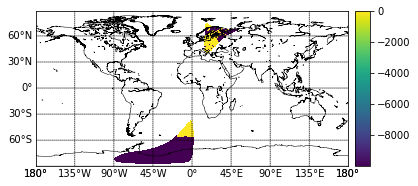

In [95]:
plotmap(f1,d1,l1,l2)